In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os

In [3]:
#dataset
RAV = r"C:\Users\ratnd\Desktop\finalyr project\ravdess"
TESS = r"C:\Users\ratnd\Desktop\finalyr project\tess"
SAVEE = r"C:\Users\ratnd\Desktop\finalyr project\savee\AudioData"
rav = os.listdir(RAV)
tess = os.listdir(TESS)
sav = os.listdir(SAVEE)
print("Ravdess files: ",rav[:])
print()
print("Tess files: ",tess[:])
print()
print("Savee Files: ",sav[:])

Ravdess files:  ['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']

Tess files:  ['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']

Savee Files:  ['DC', 'JE', 'JK', 'KL']


<i><br>SAVEE DATASET<br></i>
> Wandering in savee dataset

In [4]:
savee = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for file in savee:
    f = os.listdir(SAVEE+"\\"+file)
    for i in f:
        if i[0]=='a':
            emotion.append('male_angry')
        elif i[0]=='d':
            emotion.append('male_disgust')
        elif i[0]=='f':
            emotion.append('male_fear')
        elif i[0]=='h':
            emotion.append('male_happy')
        elif i[0]=='n':
            emotion.append('male_neutral')
        elif i[:2]=='sa':
            emotion.append('male_sad')
        elif i[:2]=='su':
            emotion.append('male_surprise')
        else:
            emotion.append('male_error') 
        path.append(SAVEE + "\\"+ file +"\\" + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_fear         60
male_disgust      60
male_angry        60
male_sad          60
male_happy        60
male_surprise     60
Name: labels, dtype: int64

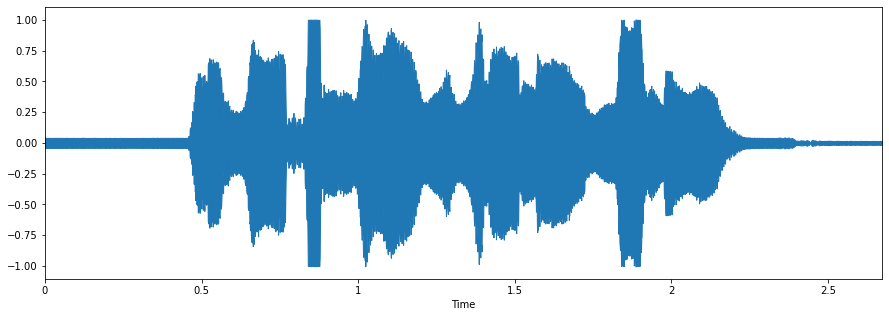

In [5]:
#Fear audio in savee dataset
fname = SAVEE + '\\DC\\f10.wav' 
data, rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

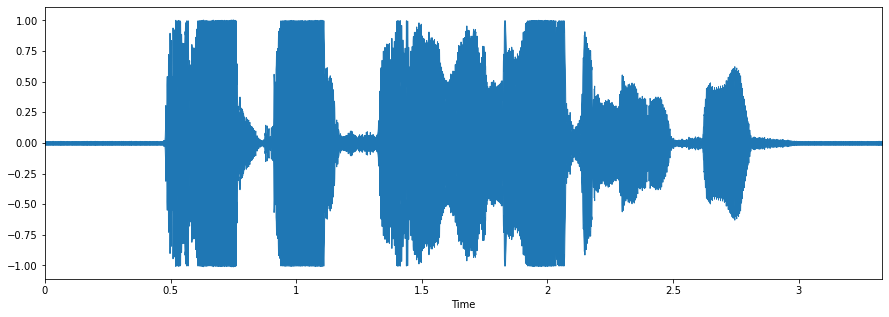

In [6]:
# happy track from savee dataset
fname = SAVEE + '\\DC\\h09.wav'  
data,rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

<i><br>RAVDESS DATASET</br></i>
> Wandering in ravdess dataset

In [7]:
rav = os.listdir(RAV)
rav.sort()

emotion = []
gender = []
path = []
for i in rav:
    fname = os.listdir(RAV +"\\"+ i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + "\\"+i + '\\' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
female_fear         96
female_happy        96
male_disgust        96
male_angry          96
male_happy          96
female_disgust      96
female_sad          96
male_fear           96
male_sad            96
male_surprise       96
female_surprise     96
female_angry        96
Name: labels, dtype: int64

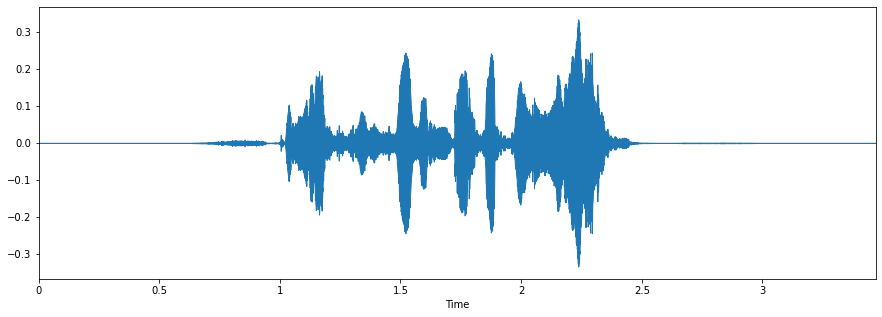

In [8]:
# fear audio from Ravdess dataset
fname = RAV + '\\Actor_14\\03-01-06-02-02-02-14.wav'  
data, rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=rate)

# Lets play the audio 
ipd.Audio(fname)

<i><br>TESS DATASET</br></i>
> Wandering in Tess dataset

In [9]:
tess = os.listdir(TESS)
tess

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [10]:
path = []
emotion = []

for i in tess:
    fname = os.listdir(TESS +"\\"+ i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + "\\"+i + "\\" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_happy       400
female_disgust     400
female_surprise    400
female_neutral     400
female_fear        400
female_sad         400
female_angry       400
Name: labels, dtype: int64

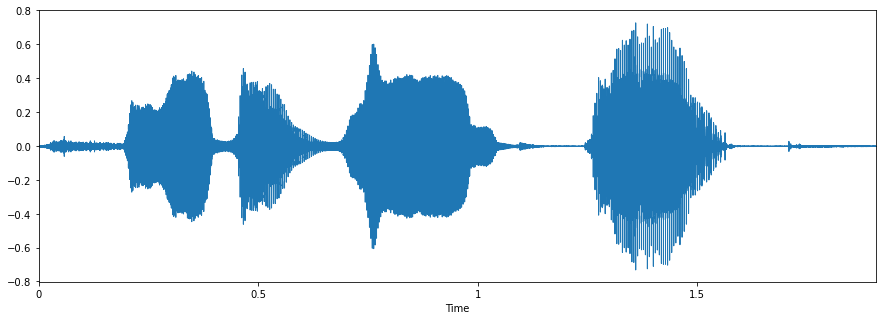

In [11]:
# a happy audio from tess dataset
fname =  TESS + '\\YAF_happy\\YAF_back_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [12]:
RAV_df.to_csv("Rav_path.csv",index=False)
SAVEE_df.to_csv("Savee_path.csv",index=False)
TESS_df.to_csv("TESS_path.csv",index=False)

In [13]:
# feature extraction 
def extract_feature(path):
    
    X,_ = librosa.load(path)
    stft = librosa.amplitude_to_db(abs(librosa.stft(X)))
    mfcc = librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=X, sr=13)
    
    return stft,mfcc,chroma

D:\Anaconda\envs\project\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")


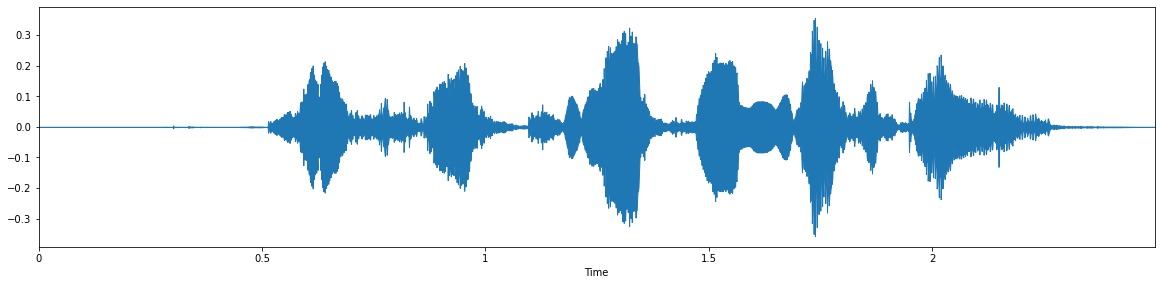

In [14]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"\\Actor_08\\03-01-05-02-01-01-08.wav"
X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
stft,mfcc,chroma = extract_feature(path)


# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=rate)
ipd.Audio(path)


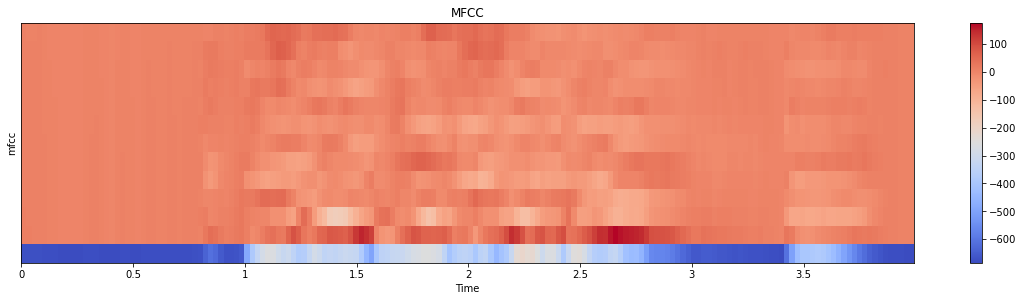

In [15]:
# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('mfcc')
plt.title("MFCC")
plt.colorbar()

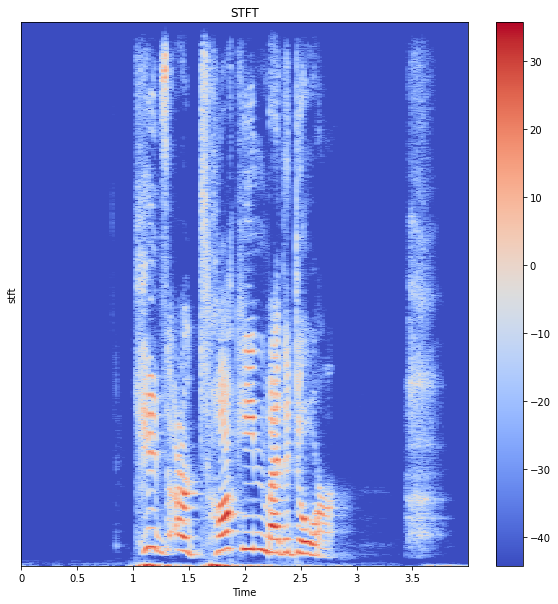

In [16]:
#stft
plt.figure(figsize=(10, 10))
librosa.display.specshow(stft, x_axis='time')
plt.ylabel('stft')
plt.title('STFT')
plt.colorbar()

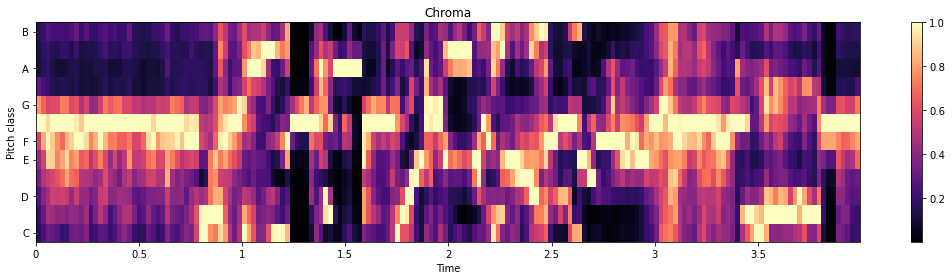

In [17]:
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma')
plt.tight_layout()
plt.show()

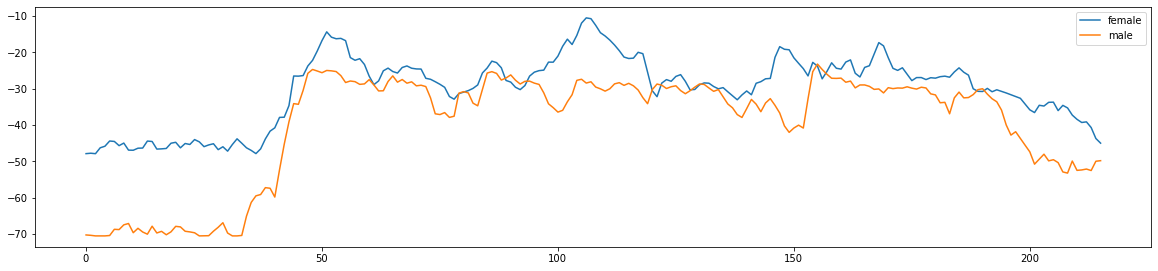

In [18]:
# RAVDESS Dataset, Gender -> Female, Emotion -> Angry 
path = RAV+"\\Actor_08\\03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(female))

# Source - RAVDESS Dataset, Gender -> Male, Emotion -> Angry 
path = RAV+"\\Actor_09\\03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
#print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

In [19]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM,Input, Flatten, Dropout, Activation, BatchNormalization, Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import glob 
import os
import pickle

In [20]:
dataset = input("Choose dataset: -> RAVEE  -> SAVEE -> TESS ")
if dataset=="RAVEE":
    full_path = pd.read_csv(r"C:\Users\ratnd\Desktop\finalyr project\Rav_path.csv")
elif dataset=="SAVEE":
    full_path = pd.read_csv(r"C:\Users\ratnd\Desktop\finalyr project\Savee_path.csv")
else:
    full_path = pd.read_csv(r"C:\Users\ratnd\Desktop\finalyr project\TESS_path.csv")
full_path.head(10)

Choose dataset: -> RAVEE  -> SAVEE -> TESS RAVEE


labels   source                                               path
0  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
1  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
2  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
3  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
4  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
5  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
6  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
7  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
8  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...
9  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...

In [21]:
def choosen_feature_extractor(fe):
    df = pd.DataFrame(columns=['feature'])

    # loop feature extraction over the entire dataset
    counter=0
    for index,path in enumerate(full_path.path):
        
        X, rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=44100,offset=0.5)
        rate = np.array(rate)
        if fe=='mfcc':
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=rate, n_mfcc=13),axis=0)  # mean as the feature
            df.loc[counter] = [mfccs]
            counter+=1  
        
        elif fe=='stft':
            stft = np.mean(librosa.amplitude_to_db(abs(librosa.stft(X))),axis=0)  # mean as the feature
            df.loc[counter]=[stft]
            counter+=1
    
        elif fe=='chroma':
            chroma = np.mean(librosa.feature.chroma_stft(y=X, sr=13),axis=0)  # mean as the feature
            df.loc[counter]=[chroma]
            counter+=1
            
    # Check a few records to make sure its processed successfully
    print(len(df))
    return df

In [22]:
fe = input('Enter the feature extractor: ')
df = choosen_feature_extractor(fe)
df.head()

Enter the feature extractor: mfcc
1440


feature
0  [-65.80097, -65.80097, -65.80097, -65.80097, -...
1  [-61.84994, -62.89504, -63.830635, -60.552586,...
2  [-65.81886, -65.81886, -65.81886, -65.81886, -...
3  [-66.05848, -66.05848, -66.05848, -66.05848, -...
4  [-70.26777, -70.26777, -70.26777, -70.26777, -...

In [23]:
df = pd.concat([full_path,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels   source                                               path  \
0  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...   
1  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...   
2  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...   
3  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...   
4  male_neutral  RAVDESS  C:\Users\ratnd\Desktop\finalyr project\ravdess...   

           0          1          2          3          4          5  \
0 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972   
1 -61.849941 -62.895039 -63.830635 -60.552586 -60.821678 -62.073399   
2 -65.818863 -65.818863 -65.818863 -65.818863 -65.805527 -65.818863   
3 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479   
4 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769   

           6  ...        206        207        208        209        210  \
0 -65.800972  ... -58.299904 -62.295246 -64.930115 -65.332123 -64.116928   
1 -64.889229  ... -65.389946 -65.389946 -65.389946 -65.389946 -65.389946   
2 -65.818863  ... -65.818863 -65.818863 -65.818863 -65.818863 -65.438057   
3 -66.058479  ... -57.539616 -55.826317 -57.741989 -59.796379 -60.975368   
4 -70.267769  ... -58.802044 -57.447464 -58.896500 -58.750996 -57.405678   

         211        212        213        214        215  
0 -64.319908 -64.971420 -63.155781 -64.178665 -63.061893  
1 -65.389946 -65.389946 -65.389946 -65.389946 -65.389946  
2 -65.684853 -65.818863 -65.818863 -65.818863 -65.818863  
3 -62.663052 -64.573494 -63.782608 -61.515789 -58.214882  
4 -60.078484 -63.426800 -62.638542 -61.082741 -60.234661  

[5 rows x 219 columns]

In [24]:
df=df.fillna(0)
print(df.shape)
df[:]

(1440, 219)


labels   source  \
0        male_neutral  RAVDESS   
1        male_neutral  RAVDESS   
2        male_neutral  RAVDESS   
3        male_neutral  RAVDESS   
4        male_neutral  RAVDESS   
...               ...      ...   
1435  female_surprise  RAVDESS   
1436  female_surprise  RAVDESS   
1437  female_surprise  RAVDESS   
1438  female_surprise  RAVDESS   
1439  female_surprise  RAVDESS   

                                                   path          0          1  \
0     C:\Users\ratnd\Desktop\finalyr project\ravdess... -65.800972 -65.800972   
1     C:\Users\ratnd\Desktop\finalyr project\ravdess... -61.849941 -62.895039   
2     C:\Users\ratnd\Desktop\finalyr project\ravdess... -65.818863 -65.818863   
3     C:\Users\ratnd\Desktop\finalyr project\ravdess... -66.058479 -66.058479   
4     C:\Users\ratnd\Desktop\finalyr project\ravdess... -70.267769 -70.267769   
...                                                 ...        ...        ...   
1435  C:\Users\ratnd\Desktop\finalyr project\ravdess... -58.988811 -58.988811   
1436  C:\Users\ratnd\Desktop\finalyr project\ravdess... -54.677158 -54.677158   
1437  C:\Users\ratnd\Desktop\finalyr project\ravdess... -56.940815 -56.940815   
1438  C:\Users\ratnd\Desktop\finalyr project\ravdess... -55.255135 -55.255135   
1439  C:\Users\ratnd\Desktop\finalyr project\ravdess... -48.668430 -45.720394   

              2          3          4          5          6  ...        206  \
0    -65.800972 -65.800972 -65.800972 -65.800972 -65.800972  ... -58.299904   
1    -63.830635 -60.552586 -60.821678 -62.073399 -64.889229  ... -65.389946   
2    -65.818863 -65.818863 -65.805527 -65.818863 -65.818863  ... -65.818863   
3    -66.058479 -66.058479 -66.058479 -66.058479 -66.058479  ... -57.539616   
4    -70.267769 -70.267769 -70.267769 -70.267769 -70.267769  ... -58.802044   
...         ...        ...        ...        ...        ...  ...        ...   
1435 -60.665466 -60.689583 -59.735569 -60.501480 -60.420517  ... -58.988811   
1436 -54.677158 -54.677158 -54.677158 -54.677158 -54.677158  ... -38.598328   
1437 -56.940815 -56.940815 -56.940815 -56.943363 -57.077030  ... -43.485588   
1438 -55.186649 -55.345295 -55.053379 -53.088177 -52.199924  ... -47.927128   
1439 -46.046833 -46.525803 -47.946480 -44.790188 -43.489738  ... -43.185242   

            207        208        209        210        211        212  \
0    -62.295246 -64.930115 -65.332123 -64.116928 -64.319908 -64.971420   
1    -65.389946 -65.389946 -65.389946 -65.389946 -65.389946 -65.389946   
2    -65.818863 -65.818863 -65.818863 -65.438057 -65.684853 -65.818863   
3    -55.826317 -57.741989 -59.796379 -60.975368 -62.663052 -64.573494   
4    -57.447464 -58.896500 -58.750996 -57.405678 -60.078484 -63.426800   
...         ...        ...        ...        ...        ...        ...   
1435 -58.988811 -58.988811 -58.916401 -58.988811 -58.988811 -58.988811   
1436 -38.009247 -40.035812 -39.657108 -40.550022 -43.559956 -45.444458   
1437 -42.686459 -44.226131 -44.101894 -43.651344 -45.493496 -47.759689   
1438 -50.145138 -48.712173 -47.603024 -45.205418 -44.438683 -48.720501   
1439 -45.281612 -48.504025 -50.357990 -44.687363 -43.194416 -46.666641   

            213        214        215  
0    -63.155781 -64.178665 -63.061893  
1    -65.389946 -65.389946 -65.389946  
2    -65.818863 -65.818863 -65.818863  
3    -63.782608 -61.515789 -58.214882  
4    -62.638542 -61.082741 -60.234661  
...         ...        ...        ...  
1435 -58.988811 -58.988811 -58.988811  
1436 -46.496017 -46.470703 -47.322212  
1437 -50.536503 -51.336391 -50.690861  
1438 -50.850346 -50.327168 -48.915745  
1439 -50.128151 -50.941978 -50.317818  

[1440 rows x 219 columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[100:110]


0          1          2          3          4          5    \
1318 -50.327824 -50.631729 -50.977806 -50.707779 -50.613647 -49.585552   
352  -71.484970 -71.484970 -71.484970 -71.484970 -71.484970 -71.484970   
1127 -56.143478 -57.140770 -59.258499 -58.218998 -58.500076 -59.042355   
124  -65.482498 -65.482498 -65.482498 -65.482498 -65.482498 -65.482498   
178  -49.352486 -49.352486 -49.352486 -49.352486 -49.352486 -49.352486   
287  -57.709717 -57.810184 -56.288765 -56.163265 -57.766644 -58.180138   
1388 -66.117416 -66.117416 -66.117416 -66.117416 -66.117416 -66.117416   
1191 -43.864265 -41.195511 -38.909504 -35.968246 -33.690361 -30.567890   
294  -60.447144 -58.060989 -56.796535 -57.869949 -63.228844 -62.001366   
976  -49.333961 -46.880264 -45.616535 -47.284031 -49.791740 -49.341904   

            6          7          8          9    ...        206        207  \
1318 -49.187546 -48.790512 -47.921543 -47.844460  ... -46.408039 -47.470093   
352  -71.484970 -71.484970 -71.484970 -71.484970  ... -64.701813 -62.322880   
1127 -59.071693 -59.926678 -59.799992 -60.456505  ... -39.123634 -39.874306   
124  -65.482498 -65.482498 -65.482498 -65.482498  ... -29.193260 -31.346556   
178  -49.352486 -49.352486 -49.352486 -49.352486  ... -36.671684 -35.579048   
287  -57.262508 -57.596676 -61.407593 -61.407593  ... -56.411995 -59.111931   
1388 -66.117416 -66.117416 -66.117416 -66.117416  ... -43.453007 -43.803917   
1191 -30.360634 -30.474628 -31.323748 -32.190502  ... -42.966194 -44.220886   
294  -59.456684 -59.739117 -61.301476 -61.207012  ... -60.849510 -61.228577   
976  -48.364414 -48.256565 -47.422981 -47.836143  ... -49.322990 -49.584549   

            208        209        210        211        212        213  \
1318 -46.677952 -46.065342 -46.087463 -47.599297 -48.780453 -48.327782   
352  -62.343601 -61.720432 -60.302925 -63.511345 -65.801910 -65.102058   
1127 -39.711956 -37.746479 -37.150047 -34.753181 -34.592815 -36.942562   
124  -34.310772 -35.800705 -35.936115 -37.631844 -40.119411 -41.662888   
178  -37.103466 -38.445827 -40.164036 -42.147789 -43.397232 -44.962273   
287  -57.864647 -58.708290 -58.263161 -56.497356 -56.549110 -57.332382   
1388 -42.635796 -43.663475 -45.017269 -43.816097 -42.771603 -42.863571   
1191 -43.140442 -43.206120 -45.155720 -45.852634 -45.274937 -44.469257   
294  -60.458992 -58.665703 -58.016243 -58.489323 -59.370388 -59.806850   
976  -50.239769 -49.892456 -49.751865 -48.283890 -46.055252 -44.511616   

            214        215  
1318 -47.857033 -48.702110  
352  -66.973267 -69.044624  
1127 -39.563274 -41.018353  
124  -41.323643 -40.710770  
178  -46.249496 -47.085442  
287  -54.212704 -53.536152  
1388 -37.602730 -31.861208  
1191 -46.633976 -45.324043  
294  -61.554016 -63.855179  
976  -43.843323 -44.914028  

[10 rows x 216 columns]

In [27]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]


0         1         2         3         4         5         6    \
1050  0.013218 -0.015602 -0.016284 -0.018857 -0.019954 -0.025474 -0.030099   
1089  0.658126  0.437559  0.284960  0.239729  0.231617  0.349034  0.432788   
1272 -0.692836 -0.240222 -0.105561 -0.198096 -0.321109 -0.366681 -0.326932   
1029 -1.505807 -1.549341 -1.566924 -1.576258 -1.576437 -1.576698 -1.556790   
1336  0.616206  0.593227  0.599255  0.599365  0.597903  0.590296  0.575932   
328  -0.417906 -0.459191 -0.489170 -0.500694 -0.545868 -0.533134 -0.475804   
318   2.113574  1.661589  1.334756  1.275116  1.131621  1.095263  1.111445   
1108  0.747256  0.660355  0.571179  0.559997  0.490477  0.452827  0.312070   
1176 -0.988807 -1.027334 -1.039164 -1.046197 -1.046689 -1.048739 -1.037181   
12   -0.885352 -0.894088 -0.945921 -0.999640 -0.973859 -0.407344 -0.289880   

           7         8         9    ...       206       207       208  \
1050 -0.029412 -0.034569 -0.042745  ... -0.853944 -0.773096 -0.694418   
1089  0.515229  0.346749  0.357337  ...  1.588554  1.576797  1.533004   
1272 -0.525811 -0.672586 -0.688538  ...  0.283665  0.052043 -0.007581   
1029 -1.544710 -1.553349 -1.558709  ... -0.957800 -1.150847 -1.473822   
1336  0.572097  0.568321  0.559029  ... -0.413377 -0.391500 -0.372411   
328  -0.492119 -0.532284 -0.570371  ... -0.010028  0.033061  0.213547   
318   1.234324  1.215479  1.209133  ...  0.377516  0.306794  0.253288   
1108  0.237593  0.432005  0.457377  ...  0.210274  0.180398  0.141039   
1176 -1.028978 -1.036432 -1.042751  ... -1.122531 -1.040908 -1.216544   
12   -0.677081 -0.989378 -0.997433  ... -1.205184 -1.414569 -1.134029   

           209       210       211       212       213       214       215  
1050 -0.704984 -0.766947 -0.752049 -0.725765 -0.697185 -0.675555 -0.634144  
1089  1.573764  1.616338  1.604260  1.631550  1.613773  1.416442  1.391229  
1272 -0.070179 -0.077815 -0.293998 -0.121769  0.008233 -0.077359 -0.300666  
1029 -1.503789 -1.030743 -0.937055 -1.288829 -1.816334 -1.679113 -1.546525  
1336 -0.345039 -0.324318 -0.307139 -0.279302 -0.252931 -0.238643 -0.229136  
328   0.066864 -0.146955 -0.445834 -0.380108 -0.575610 -0.877942 -0.593433  
318   0.299639  0.331337  0.354376  0.317141  0.300990  0.303820  0.238673  
1108 -0.035385  0.167802  0.231010  0.094301 -0.045554 -0.006188  0.098362  
1176 -1.344459 -1.322915 -1.444354 -1.467681 -1.243534 -1.112306 -0.849448  
12   -1.193782 -0.990329 -1.031846 -1.409628 -1.399563 -1.318564 -1.142881  

[10 rows x 216 columns]

In [28]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1080, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [29]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1)

In [30]:
def model1():
    model = Sequential()
    model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(256, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))

    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(14)) # Target class number
    model.add(Activation('softmax'))
    # opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    # opt = keras.optimizers.Adam(lr=0.0001)
    opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
    model.summary()
    return model

In [35]:
def model2():
    model = Sequential()
    model.add(Conv1D(128, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))
    model.add(Conv1D(128, 8, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(64, 8, padding='same'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(14)) # Target class number
    model.add(Activation('softmax'))
    # opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    # opt = keras.optimizers.Adam(lr=0.0001)
    
    return model

In [ ]:
model = model2()
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
34/34 [==============================] - 4s 125ms/step - loss: 2.6425 - accuracy: 0.1130 - val_loss: 2.6348 - val_accuracy: 0.0750
Epoch 2/100
34/34 [==============================] - 4s 117ms/step - loss: 2.5238 - accuracy: 0.1546 - val_loss: 2.6297 - val_accuracy: 0.1389
Epoch 3/100
34/34 [==============================] - 4s 117ms/step - loss: 2.4433 - accuracy: 0.1852 - val_loss: 2.6232 - val_accuracy: 0.1750
Epoch 4/100
34/34 [==============================] - 4s 128ms/step - loss: 2.3800 - accuracy: 0.1972 - val_loss: 2.6150 - val_accuracy: 0.2139
Epoch 5/100
34/34 [==============================] - 4s 129ms/step - loss: 2.3265 - accuracy: 0.2120 - val_loss: 2.6052 - val_accuracy: 0.2139
Epoch 6/100
34/34 [==============================] - 4s 121ms/step - loss: 2.2899 - accuracy: 0.2111 - val_loss: 2.5926 - val_accuracy: 0.2111
Epoch 7/100
34/34 [==============================] - 4s 117ms/step - loss: 2.2483 - accuracy: 0.2296 - val_loss: 2.5770 - val_accuracy: 0.2333

Epoch 58/100
34/34 [==============================] - 5s 134ms/step - loss: 1.6568 - accuracy: 0.4315 - val_loss: 1.8160 - val_accuracy: 0.3583
Epoch 59/100
34/34 [==============================] - 4s 128ms/step - loss: 1.6484 - accuracy: 0.4296 - val_loss: 1.8201 - val_accuracy: 0.3694
Epoch 60/100
34/34 [==============================] - 4s 130ms/step - loss: 1.6382 - accuracy: 0.4389 - val_loss: 1.8137 - val_accuracy: 0.3667
Epoch 61/100
34/34 [==============================] - 5s 149ms/step - loss: 1.6261 - accuracy: 0.4454 - val_loss: 1.8196 - val_accuracy: 0.3667
Epoch 62/100
34/34 [==============================] - 5s 150ms/step - loss: 1.6385 - accuracy: 0.4491 - val_loss: 1.8076 - val_accuracy: 0.3722
Epoch 63/100
34/34 [==============================] - 5s 159ms/step - loss: 1.6196 - accuracy: 0.4537 - val_loss: 1.8017 - val_accuracy: 0.3667
Epoch 64/100
34/34 [==============================] - 5s 141ms/step - loss: 1.6171 - accuracy: 0.4500 - val_loss: 1.7979 - val_accuracy:

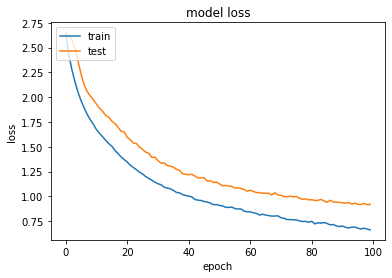

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()